In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
from matplotlib.animation import PillowWriter
#plt.style.use(['science', 'notebook'])
from itertools import combinations

In [2]:
Nm=1000
r=np.random.rand(Nm,3)

In [3]:
#m=1 k*T=1
m = 1

pi = np.pi
d = 0.05
sigmat = pi * d ** 2

mu = 1.01603 * (5/16) * (np.sqrt(pi) / sigmat)


#v_med = np.sqrt(8/pi)
v_med = 100
#vm = np.sqrt(2)
vm = (np.sqrt(pi) * v_med) / 2


V = 1

Fn = 100
N = Fn*Nm

n = N / V
p = n

l = (mu*vm)/p

gr_med = np.sqrt(2)*v_med

tau = l/vm
dt = 0.1*tau
Nmft = 20 #nuber of mean-free-paths to run the simulation
Nt = 50*Nmft #number of timesteps

Nm_col = (Fn * Nm**2 * sigmat * gr_med * dt)/2

In [4]:
Nm_col

3979.3898841770856

In [5]:
v = np.zeros([Nm,3])
v[r[:,0]<0.5,0]=v_med
v[r[:,0]>=0.5,0]=-v_med

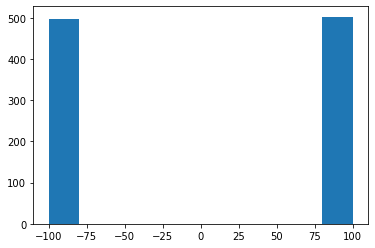

In [6]:
plt.hist(v[:,0])

plt.show()

In [7]:
def motion(r, v):
    rs = np.zeros((Nt, r.shape[0], r.shape[1]))
    vs = np.zeros((Nt, v.shape[0], v.shape[1]))
    rs[0] = r.copy()
    vs[0] = v.copy()
    for a in range(1,Nt):
    
        r = r + v*dt
        #plt.hist(np.sqrt(np.sum(v**2, axis=1)), bins = np.linspace(0,400,20), density=True)
        #plt.show()
        
        for b in range(int(Nm_col)):
            i = np.random.randint(1,Nm)
            j = np.random.randint(1,Nm)
        
            if i==j:
                break
            
            g = (v[i,:] - v[j,:])
            G = 0.5 * (v[i,:] + v[j,:])
        
            gr = np.sqrt(sum(g**2))
        
            RF1 = np.random.random()
        
            if (gr/gr_med > RF1):
            
                e = 2*pi*np.random.random()
                cosx = 2*np.random.random() - 1
                sinx = np.sqrt(1 - cosx**2)
            
                grl = gr*np.array([cosx, sinx*np.sin(e), sinx*np.cos(e)])
            
                v[i,:] = G + 0.5 *  grl
                v[j,:] = G - 0.5 *  grl
            else:
                continue
        rs[a] = r.copy()
        vs[a] = v.copy()
    return rs, vs

In [8]:
rs, vs = motion(r,v)

In [9]:
np.shape(vs)

(1000, 1000, 3)

Text(0, 0.5, '# Particles')

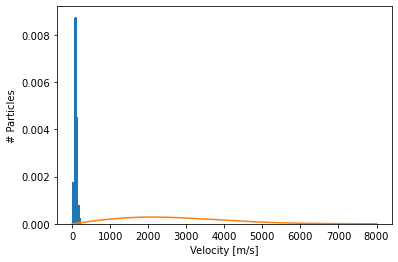

In [10]:
v2 = np.linspace(0, 8000, 1000)
a = 2/3000**2
fv = a*v2*np.exp(-a*v2**2 / 2)
bins = np.linspace(0,8000,200)
plt.figure()
plt.hist(np.sqrt(np.sum(v**2, axis=1)), bins=bins, density=True)
plt.plot(v2,fv)
plt.xlabel('Velocity [m/s]')
plt.ylabel('# Particles')

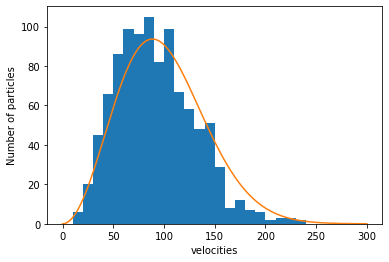

In [41]:
bins = np.arange(0,300,10)
plt.hist(np.sqrt(np.sum(vs[999]**2,axis=1)),bins=bins)
v3 = np.linspace(0,300,10000)
fv3 = 10000*(4.0/(np.sqrt(pi)*vm**3))*(v3**2)*np.exp(-(v3/vm)**2)
plt.plot(v3,fv3)
plt.xlabel('velocities')
plt.ylabel('Number of particles')
plt.show()

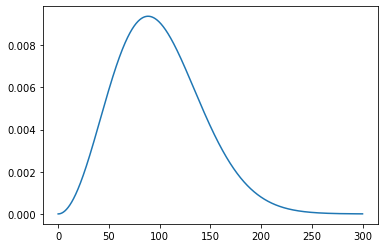

In [44]:
v3 = np.linspace(0,300,10000)
fv3 = (4.0/(np.sqrt(pi)*vm**3))*(v3**2)*np.exp(-(v3/vm)**2)
plt.plot(v3,fv3)

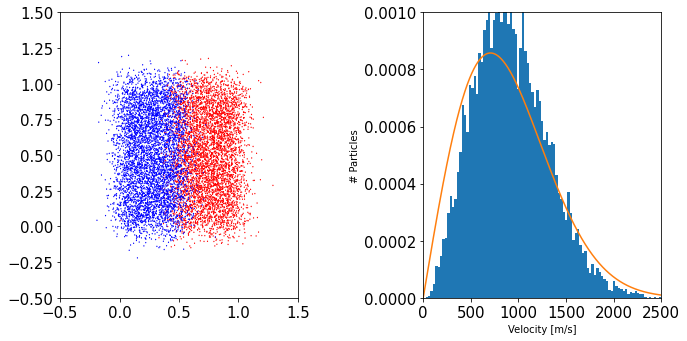

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
rs[:,:,2]=0
def animate(i):
    [ax.clear() for ax in axes]
    ax = axes[0]
    xred, yred = rs[i][r[:,0]>0.5,0], rs[i][r[:,0]>0.5,1]
    xblue, yblue = rs[i][r[:,0]<=0.5,0], rs[i][r[:,0]<=0.5,1]
    circles_red = [plt.Circle((xi, yi), radius=0.005, linewidth=0) for xi,yi in zip(xred,yred)]
    circles_blue = [plt.Circle((xi, yi), radius=0.005, linewidth=0) for xi,yi in zip(xblue,yblue)]
    cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
    cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(-0.5,1.5)
    ax.set_ylim(-0.5,1.5)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax = axes[1]
    ax.hist(np.sqrt(np.sum(vs[i]**2, axis=1)), bins=bins, density=True, label='Particles velocity distribution.')
    ax.plot(v2,fv, label='Maxwellian Velocity Distribution Function')
    #ax.legend()
    ax.set_xlabel('Velocity [m/s]')
    ax.set_ylabel('# Particles')
    ax.set_xlim(0,8000)
    ax.set_ylim(0,0.0004)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    fig.tight_layout()
    
    
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('ani10k.gif',writer='pillow',fps=30,dpi=100)

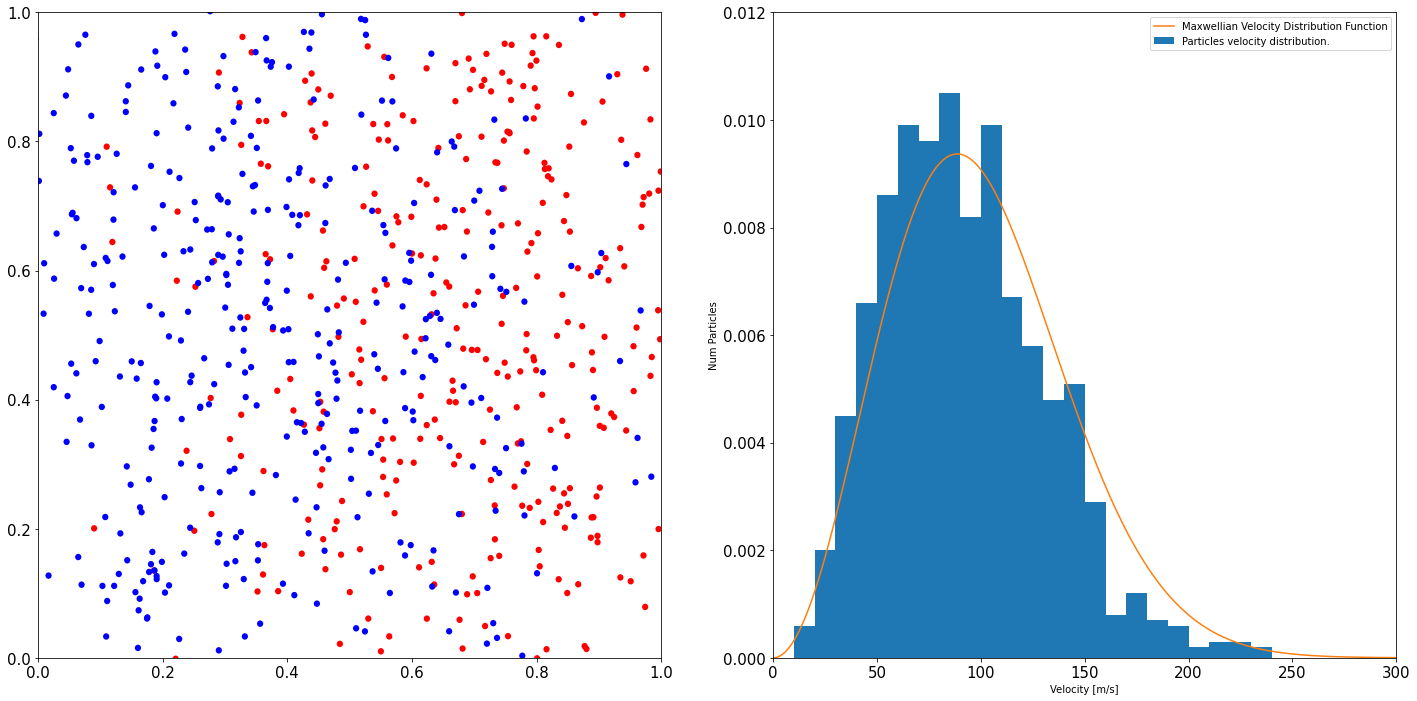

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
rs[:,:,2]=0
def animate(i):
    [ax.clear() for ax in axes]
    ax = axes[0]
    xred, yred = rs[i][r[:,0]>0.5,0], rs[i][r[:,0]>0.5,1]
    xblue, yblue = rs[i][r[:,0]<=0.5,0], rs[i][r[:,0]<=0.5,1]
    circles_red = [plt.Circle((xi, yi), radius=0.005, linewidth=0) for xi,yi in zip(xred,yred)]
    circles_blue = [plt.Circle((xi, yi), radius=0.005, linewidth=0) for xi,yi in zip(xblue,yblue)]
    cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
    cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax = axes[1]
    ax.hist(np.sqrt(np.sum(vs[i]**2, axis=1)), bins=bins, density=True, label='Particles velocity distribution.')
    ax.plot(v3,fv3, label='Maxwellian Velocity Distribution Function')
    ax.legend()
    ax.set_xlabel('Velocity [m/s]')
    ax.set_ylabel('Num Particles')
    ax.set_xlim(0,300)
    ax.set_ylim(0,0.012)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    fig.tight_layout()

writermp4 = animation.FFMpegWriter(fps=30) 
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('anivid2.mp4',writer=writermp4,dpi=100)

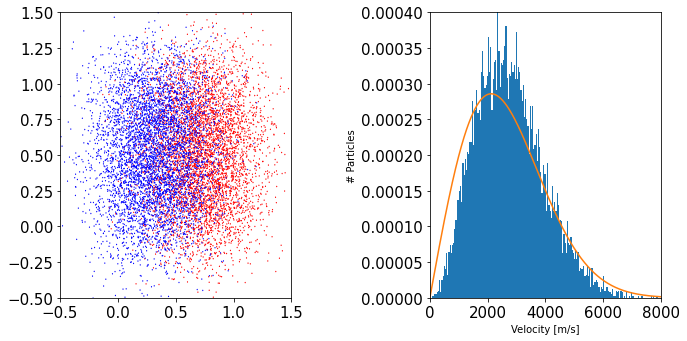

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
rs[:,:,2]=0
def animate(i):
    [ax.clear() for ax in axes]
    ax = axes[0]
    xred, yred = rs[i][r[:,0]>0.5,0], rs[i][r[:,0]>0.5,1]
    xblue, yblue = rs[i][r[:,0]<=0.5,0], rs[i][r[:,0]<=0.5,1]
    circles_red = [plt.Circle((xi, yi), radius=0.005, linewidth=0) for xi,yi in zip(xred,yred)]
    circles_blue = [plt.Circle((xi, yi), radius=0.005, linewidth=0) for xi,yi in zip(xblue,yblue)]
    cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
    cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(-0.5,1.5)
    ax.set_ylim(-0.5,1.5)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax = axes[1]
    ax.hist(np.sqrt(np.sum(vs[i]**2, axis=1)), bins=bins, density=True, label='Particles velocity distribution.')
    ax.plot(v2,fv, label='Maxwellian Velocity Distribution Function')
    #ax.legend()
    ax.set_xlabel('Velocity [m/s]')
    ax.set_ylabel('# Particles')
    ax.set_xlim(0,8000)
    ax.set_ylim(0,0.0004)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    fig.tight_layout()
    

writermp4 = animation.FFMpegWriter(fps=30) 
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('n=10k-v=3k.mp4',writer=writermp4,dpi=100)

In [16]:
r[:,0]

array([0.92729545, 0.21146818, 0.59116665, 0.58571387, 0.67293621,
       0.95897683, 0.07817179, 0.26462612, 0.95982102, 0.36551319,
       0.58781282, 0.40862726, 0.33329011, 0.02091159, 0.66404706,
       0.29456542, 0.74010785, 0.99958752, 0.75975534, 0.6009707 ,
       0.75905191, 0.8141024 , 0.63780238, 0.99680863, 0.01746047,
       0.47144924, 0.14596412, 0.97320619, 0.22500023, 0.28699422,
       0.13154475, 0.31088007, 0.90495954, 0.56875572, 0.03922118,
       0.74036066, 0.44044252, 0.4111306 , 0.13534174, 0.14055657,
       0.46747601, 0.65414694, 0.24800315, 0.49188536, 0.06552208,
       0.84297767, 0.73550658, 0.31538848, 0.96477255, 0.19549348,
       0.67443762, 0.00786455, 0.67729584, 0.36697426, 0.48286588,
       0.62460394, 0.2631175 , 0.67396602, 0.41361403, 0.84597591,
       0.5057693 , 0.78130018, 0.16999259, 0.93755456, 0.77104386,
       0.21174749, 0.58745315, 0.70524267, 0.25778038, 0.86687521,
       0.47932074, 0.81424544, 0.97153864, 0.0181261 , 0.69074

(array([  2.,   7.,  15.,  43.,  62.,  80., 103., 103., 102.,  94.,  77.,
         82.,  64.,  45.,  40.,  25.,  26.,  11.,   9.,   3.,   2.,   2.,
          2.,   1.,   0.,   0.,   0.,   0.,   0.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290]),
 <BarContainer object of 29 artists>)

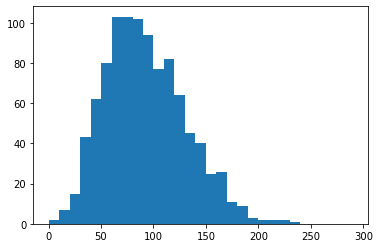

In [55]:
plt.hist(np.sqrt(np.sum(vs[100]**2,axis=1)),bins=bins)